**Install python dependencies**

In [ ]:
!pip install -q -r ./dependencies/requirements.txt

**Load python libraries**

In [ ]:
# To get a clearly laid out notebook
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, MinMaxScaler


In [ ]:
def result_to_points(result):
    if result == 'H':
        return 3
    elif result == 'D':
        return 1
    else:
        return 0

def calculate_odds_pred(odds_win, odds_lose):
    delta = odds_win - odds_lose
    if abs(delta) <= 0.5:
        return 'D'
    else:
        if delta > 0:
            return 'A'
        else:
            return 'H'


In [ ]:
data = pd.read_csv('./data/odds_20_21.csv')

df = data[['FTHG', 'FTAG', 'FTR', 'AvgH', 'AvgD', 'AvgA']]
df.columns = ['goals_scored', 'goals_conceded', 'result', 'odds_win', 'odds_draw', 'odds_lose']

df['odds_pred'] = df[['odds_win', 'odds_lose']].apply(lambda x: calculate_odds_pred(*x), axis=1)
df['pred_correct'] = df['result'] == df['odds_pred']

df['pred_correct'].value_counts(normalize=True)[True]

In [ ]:
df['goals_difference'] = abs(df['goals_scored'] - df['goals_conceded'])

df['points'] = df.result.apply(lambda x: result_to_points(x))

df.result = LabelEncoder().fit_transform(df.result)

df

In [ ]:
result = df.result
df = df.drop(['result', 'odds_pred', 'pred_correct'], axis='columns')
df_scaled = pd.DataFrame(MinMaxScaler().fit_transform(df), columns=df.columns)

df_scaled


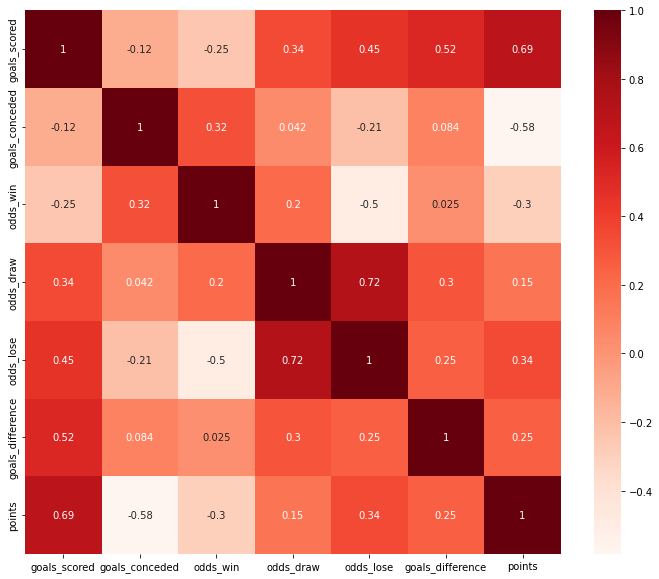

In [97]:
plt.figure(figsize=(12,10))
sns.heatmap(df_scaled.corr(), annot=True, cmap=plt.cm.Reds)
plt.show()

für morgen:

-> heute bewiesen: 
    odds haben effekte auf punkte, goal_difference, results und goals scored
    --> odds haben aussagekraft auf gesamtpunktzahl des teams

todos:
    - mehr ein regression problem daraus machen (er soll als label nicht die genaue zahl voraussagen, wichtig ist dass der abstand zur realität so gering wie möglich ist, MAE, MSE, usw.)
    - er soll nach regeln das team aufstellen und als vergleich das optimale team nehmen, abstand verringern
    - punkte vorrausage für einen spieler besteht aus zwei teilen, 1. generelle schätzung durch historische werte + 2. einfluss betting odds